# Lab 1 - Braggdiffraksjon
## Oppgave A Bremsestråling
### 1.


In [29]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import linregress

[12.  12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5
 19.  19.5 20.  20.5 21.  21.5 22. ]


Text(0, 0.5, 'Intensitet')

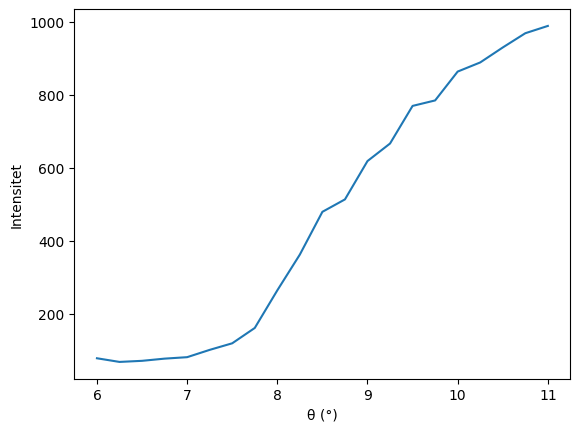

In [28]:
Δϑ = 0.5

I = np.array([79, 69, 72, 78, 82, 102, 120, 162, 265, 363, 480, 514, 619, 667, 770, 785, 864, 889, 930, 969, 989])
ϑ = np.arange(12,12 + Δϑ*len(I), Δϑ) / 2

print(2*ϑ)
plt.plot(ϑ, I)
plt.xlabel('θ (°)')
plt.ylabel('Intensitet')

Vi estimerer fra grafen at $ϑ_{min} = 7.5^{°}$ Det ser vi på øyemal fra hvor en linreg fra grafens flate parti i starten vil møte en linreg fra grafens parti med høyest vekst. 

In [54]:
from scipy.constants import c, m_e, e, h


def U_func(n, θ):
    d = 200.5E-12
    λ = 2*d*np.sin(θ)/n
    E = h*c/λ
    return E/e*1E-3

ϑ_min = 7.5
ϑ_min_rad = 7.5 * np.pi / 180
print(U_func(1, ϑ_min))
print(U_func(1, ϑ_min_rad))

3.2962423765506133
23.687776530214357


In [39]:
# Ikke nødvendig

# x = np.linspace(0,1, 100)
# y1 = linregress(ϑ[:4], I[:4]).slope
# y2 = linregress(ϑ[5:10], I[5:10]).slope

# plt.plot(x, x*y1)
# plt.plot(x, x*y2)

## Oppgave B Karakteristiske linjer
### 1. 

In [ ]:
Δϑ = 0.5

ϑ = np.arange(12,12 + Δϑ*len(I), Δϑ) / 2


## Oppgave C Elektrondiffraksjon
### 1. 


In [58]:
from scipy.constants import c, m_e, e, h

def f(U):
    # e = -1.602 * 10**(-19)
    # m_e = 9.109 * 10**(-31)
    # c = 2.99*10**8
    return 1/(np.sqrt(1 + (e*U)/(2*m_e*c**2)))

print(f(np.array([1, 5, 20, 50, 100])*1000))

[0.99951112 0.99756275 0.99035655 0.97640059 0.95439681]


### 2. 

In [93]:
dyy = np.array([5.5, 5.2, 5.0, 4.8, 4.7, 4.6, 4.4, 4.3, 4.2])
dyi = np.array([4.7, 4.5, 4.3, 4.2, 4.2, 4.0, 4.0, 3.8, 3.7])
diy = np.array([3.2, 3.1, 3.0, 2.7, 2.7, 2.6, 2.6, 2.5, 2.4])
dii = np.array([2.7, 2.5, 2.3, 2.3, 2.3, 2.2, 2.1, 2.0, 2.0])

V = np.array([3.00,  3.25, 3.5,   3.75,  4.00,  4.25,  4.50,  4.75,  5.00 ])*1E3
I = np.array([0.027, 0.03, 0.032, 0.034, 0.036, 0.039, 0.041, 0.043, 0.045])*1E-3

dy = (dyy + dyi) / 2
di = (diy + dii) / 2

print(f'dy_mean: {np.average(dy): .2f}    ± {np.std(dy)/np.sqrt(len(dy)): .2}')
print(f'di_mean: {np.average(di): .2f}    ± {np.std(di)/np.sqrt(len(di)): .2}')
print(f'dy/di:   {np.average(dy/di): .2f} ± {np.std(dy/di)/np.sqrt(len(dy)): .2}')


dy_mean:  4.45    ±  0.12
di_mean:  2.51    ±  0.078
dy/di:    1.77 ±  0.009


### 3. / 4. 

In [91]:
L = 125E-3

def λ(U):
    λ_c = 2.426 
    return λ_c * np.sqrt((m_e*c**2)/(2*e*U))*f(U)

def d(U, D):
    return 2*λ(U)*L/D


d10 = d(V, di)
d11 = d(V, dy)
σL = 2E-3
σd10 = np.std(d10)/np.sqrt(len(d10))
σd11 = np.std(d11)/np.sqrt(len(d11))
σd = d10/d11 * np.sqrt()

print(f'd10 = {np.average(d10): .2f} ± {np.std(d10)/np.sqrt(len(d10)): .2}')
print(f'd11 = {np.average(d11): .2f} ± {np.std(d11)/np.sqrt(len(d11)): .2}')
print(f'd10/d11: {np.average(d10/d11): .2f}')
print(f'√3:      {np.sqrt(3): .2f}')

d10 =  1.95 ±  0.0097
d11 =  1.10 ±  0.0031
d10/d11:  1.77
√3:       1.73
